In [6]:
import yfinance as yf
import numpy as np

In [7]:
data = yf.download("aapl", start="2020-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [8]:
returns = data["Adj Close"].pct_change()

In [14]:
def omega_ratio(returns, required_return=0.0):
    """Determines the Omega ratio of a strategy.

    Parameters
    ----------
    returns: pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    required_return: float, optional
        Minimum acceptance return of the investor. Threshold over which to
        consider positive vs negative returns. It will be converted to a 
        value appropritae for the period of the returns. E.g An annual minimum
        acceptable return of 100 will translate to a minimum acceptable
        reutnr of 0.018

    Returns
    -------
    omega_ratio : float

    Note
    ----
    See https://en.wikipedia.org/wiki/Omega_ratio for more details.
    """

    return_threshold = (1 + required_return) ** (1/252) - 1

    returns_less_thresh = returns - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    
    return np.nan

<AxesSubplot: >

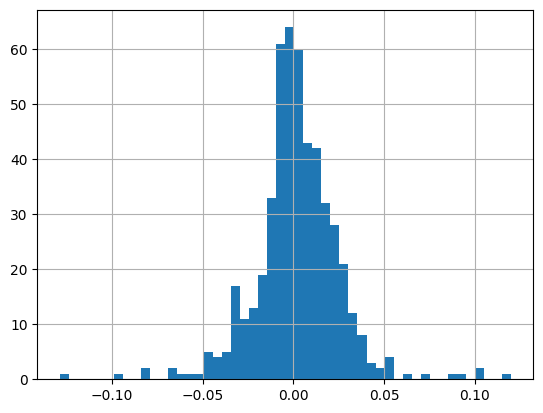

In [10]:
returns.hist(bins=50)

In [11]:
returns.skew()

-0.011895716270877753

In [13]:
returns.kurtosis()

5.3495622153199

In [15]:
# We use a threshold of 7% which is the historical average annual return of the stock market
omega_ratio(returns, 0.07)

1.2413491370552874

In [ ]:
# Taking into consideration skew and kurtosis AAPL gains outperformed the losses by a factor of 1.2
# See also Tail risk (not taken into account with sharpe ratio)